In [1]:
import pandas as  pd

In [2]:
titanic_df = pd.read_csv("titanic-data.csv")

In [3]:
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## 1. Bar Graph

In [4]:
titanic_df['Survived'].value_counts()

Survived
0    549
1    342
Name: count, dtype: int64

<Axes: title={'center': 'Count of Survived Passengers'}, xlabel='Survived (0=No, 1=Yes)', ylabel='No. of Passengers'>

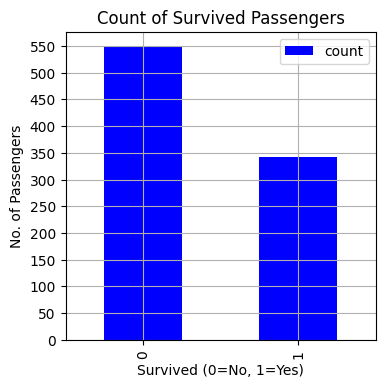

In [5]:
titanic_df['Survived'].value_counts().plot(
    kind="bar",
    title = "Count of Survived Passengers",
    figsize = (4,4),
    legend = True,
    yticks = list(range(0,600, 50)),
    xlabel = "Survived (0=No, 1=Yes)",
    ylabel = "No. of Passengers",
    grid = True,
    colormap = "bwr"
)

In [6]:
group_by_gender = titanic_df[["Sex","Survived"]].groupby(by="Sex")

In [7]:
group_by_gender["Survived"].value_counts()

Sex     Survived
female  1           233
        0            81
male    0           468
        1           109
Name: count, dtype: int64

<Axes: title={'center': 'Count of Survived Passengers'}, xlabel='Survived (0=No, 1=Yes)', ylabel='No. of Passengers'>

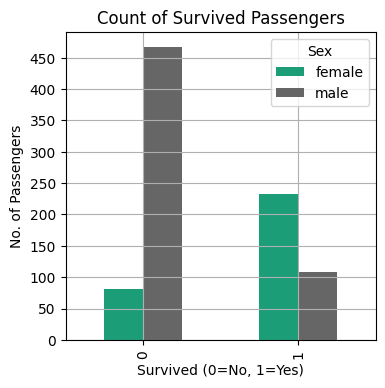

In [8]:
pd.crosstab(titanic_df.Survived, titanic_df.Sex).plot(
    kind="bar",
    title = "Count of Survived Passengers",
    figsize = (4,4),
    legend = True,
    yticks = list(range(0,500, 50)),
    xlabel = "Survived (0=No, 1=Yes)",
    ylabel = "No. of Passengers",
    grid = True,
    colormap = "Dark2"
)

In [9]:
group_by_embarked= titanic_df[["Embarked","Age"]].groupby(by="Embarked")

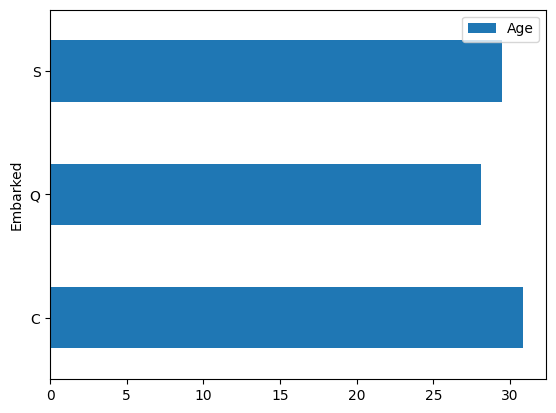

In [10]:
ax = group_by_embarked.mean().plot(kind="barh")

# Set custom x-tick labels
# ax.set_xticklabels(["Ch","Que","South"], rotation = 45)

## 2. Pie Chart

<Axes: ylabel='Age'>

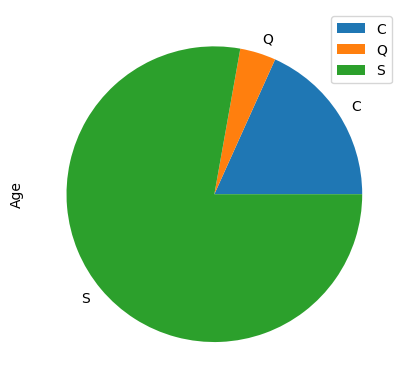

In [11]:
group_by_embarked= titanic_df[["Embarked","Age"]].groupby(by="Embarked")
group_by_embarked.count().plot(
    kind="pie", y="Age"
)

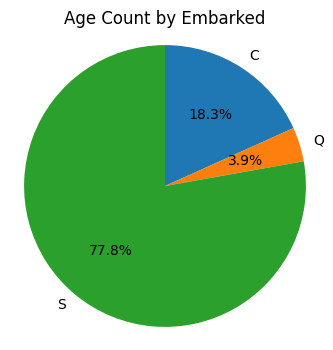

In [12]:
import matplotlib.pyplot as plt

# Group and count Age by Embarked
group_by_embarked = titanic_df[["Embarked", "Age"]].groupby(by="Embarked").count()

# Plot with matplotlib for full control
plt.figure(figsize=(4,4))
plt.pie(
    group_by_embarked["Age"],
    labels=group_by_embarked.index,
    autopct='%1.1f%%',  # shows percentage inside pie
    startangle=90,
    counterclock=False
)
plt.title("Age Count by Embarked")
plt.axis('equal')  # Equal aspect ratio ensures the pie is circular.
plt.show()


array([<Axes: ylabel='female'>, <Axes: ylabel='male'>], dtype=object)

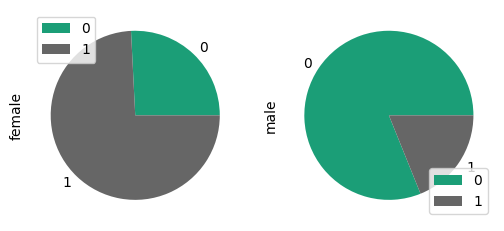

In [13]:
pd.crosstab(titanic_df.Survived, titanic_df.Sex).plot(
    kind="pie",
    subplots = True,
    # title = "Count of Survived Passengers",
    fontsize = 10,
    figsize = (6,8),
    colormap = "Dark2"
)

## 3. Line Graph

<Axes: >

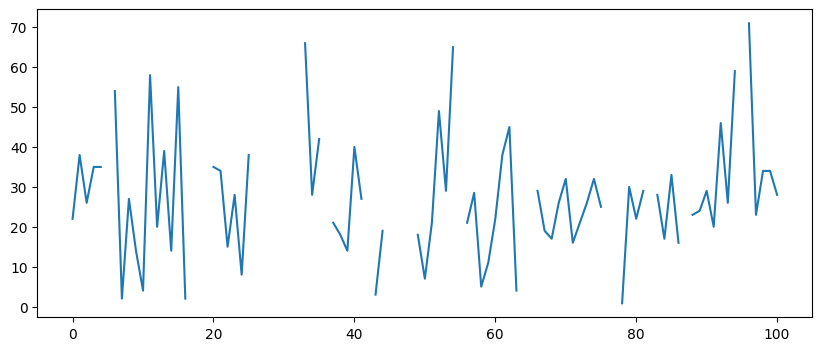

In [14]:
titanic_df["Age"].loc[:100].plot.line(figsize = (10,4))

<Axes: >

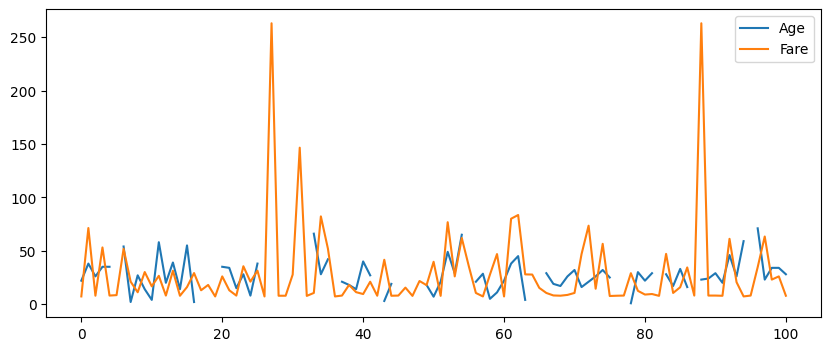

In [15]:
titanic_df.loc[:100,["Age","Fare"]].plot.line(figsize = (10,4))

## 4. Scatter Plot

<Axes: xlabel='Age', ylabel='Fare'>

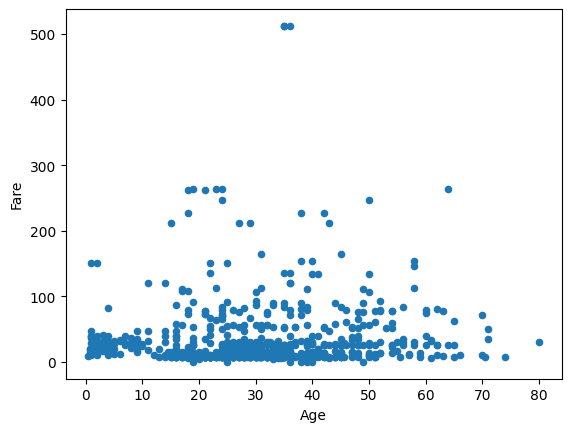

In [16]:
titanic_df.plot.scatter(x = "Age", y = "Fare")

<Axes: xlabel='Age', ylabel='Fare'>

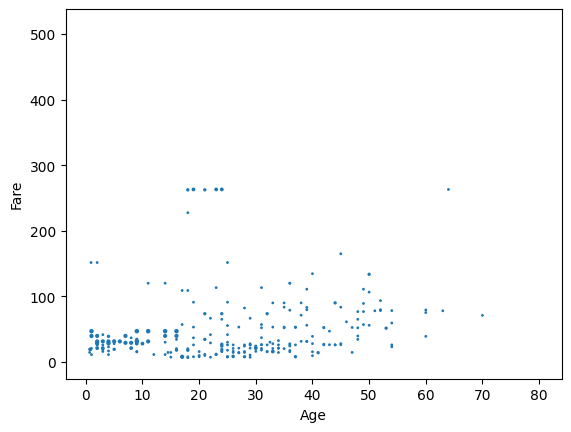

In [21]:
titanic_df.plot.scatter(x = "Age", y = "Fare", s = "SibSp", legend = True)


## 5. Histogram

<Axes: ylabel='Frequency'>

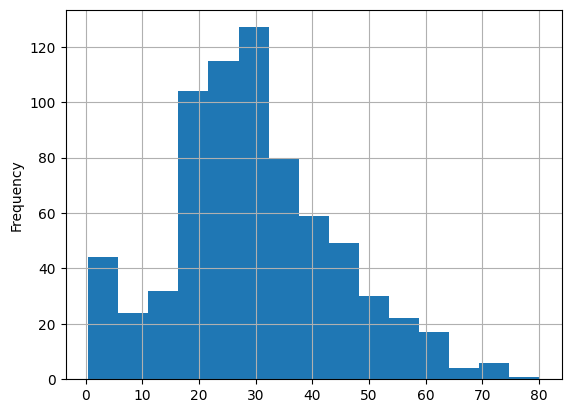

In [42]:
titanic_df["Age"].plot.hist(bins = 15, grid = True)

<Axes: ylabel='Density'>

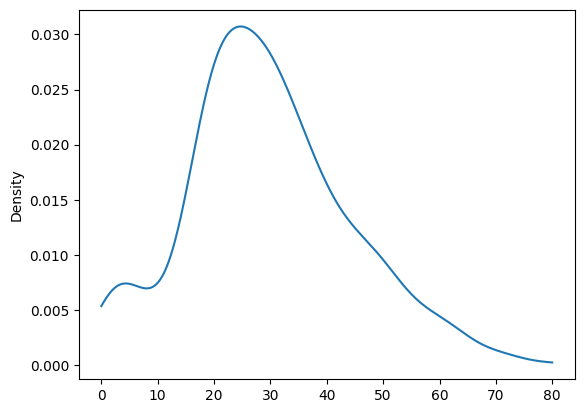

In [39]:
import numpy as np

titanic_df.Age.plot.kde(ind = np.linspace(0,80,500))

## 6. Box plot

https://media.labxchange.org/xblocks/lb-LabXchange-d8863c77-html-1/211626365402575-b88c4d0fdacd5abb4c3dc2de3bc004bb.png

Age    Axes(0.125,0.11;0.775x0.77)
dtype: object

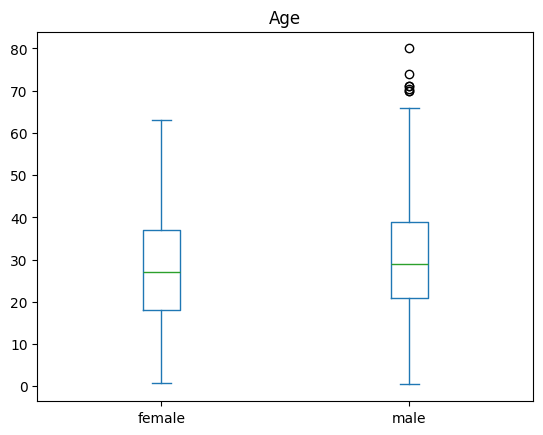

In [52]:
titanic_df.plot.box(column = "Age", by="Sex")

## 7. Heatmap

In [55]:
# !pip install seaborn

import seaborn as sns

In [58]:
correlation = titanic_df.corr(numeric_only = True)
correlation

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005007,-0.035144,0.036847,-0.057527,-0.001652,0.012658
Survived,-0.005007,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307
Pclass,-0.035144,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500
Age,0.036847,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067
SibSp,-0.057527,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651
Parch,-0.001652,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225
Fare,0.012658,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000


<Axes: >

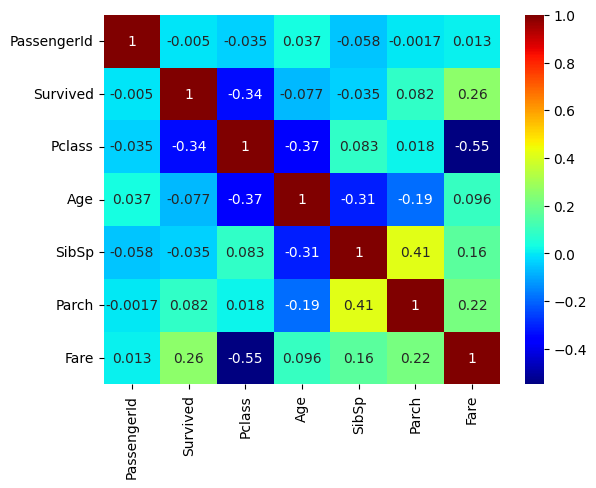

In [62]:
sns.heatmap(correlation, annot = True, cmap = "jet")